<a href="https://colab.research.google.com/github/sambitdash/EVA-2-Group/blob/master/Phase2/Session-1/SentimentUsingGlove-UpateEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Prediction From Movie Reviews

* Use GloVe Word Embeddings

The code is extracted from the book - [Deep Learning with Python - Francois Chollet](http://faculty.neu.edu.cn/yury/AAI/Textbook/Deep%20Learning%20with%20Python.pdf).

Refer to Chapter 6 - Deep leraning for text and sequences.


## Imports

In [0]:
import numpy as np
import os

## Download IMDB Raw Dataset

There is Imdb dataset as part of Keras dataset as well.
But, they are optimized and provide the reviews in terms of integers (word indices). There may be a way to obatin the real review (by fetching the real word from the word-index).

Instead the Raw Imdb dataset is provided by the Keras author at the below mentioned url location. Let's make use of that.

In [2]:
## keras provides the processed Imdb dataset as list of word-indexes.
## We need to get the raw Imdb dataset
!wget --no-check-certificate http://mng.bz/0tIo

--2020-01-22 16:26:27--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2020-01-22 16:26:28--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2020-01-22 16:26:28--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.41.14
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.41.14|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  26.0MB/s    in 2.2s    

2020-01-22 16:26:31 (26.0 MB/s) - ‘0tIo’ saved [60711700/60711700]



In [0]:
!unzip -q 0tIo

## Check Dataset
Count number of positive and negative examples (12500 each)



In [4]:
!ls -1 aclImdb/train/neg | wc -l

12500


In [5]:
!ls -1 aclImdb/train/pos | wc -l

12500


## Read Imdb Dataset

Read the dataset by going over both postive and negative review directories under **train** folder of the dataset.

In [0]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

# go thru both directories
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)

    # go thru each review in the directory
    for fname in os.listdir(dir_name):
        nm, ext = os.path.splitext(fname)
        # get the extension
        if ext == '.txt':
        # get the review
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            # build the labels
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [7]:
print(len(labels))

25000


In [8]:
print(len(texts))

25000


## Tokenize the Imdb Reviews

For each review (group of words), convert them into word-indices (index to unique word).

In [9]:
%tensorflow_version 1.0
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


### Configurations

In [0]:
maxlen = 100 # cuts off reviews after 100 words

# let's try 1000 words
#maxlen = 1000
training_samples = 8000 # train only on 8000 samples
validation_samples = 10000
max_words = 10000

### Tokenize the reviews

In [11]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


### Split data into training and validation set.

In [13]:
# Splits the data into a training set and a validation set, but first shuffles the data because you're starting with data in which samples are ordered, all negatives first, then all positives
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

print(len(x_train))
print(len(y_train))
print(y_train.shape)
print(len(x_val))
print(len(y_val))

8000
8000
(8000,)
10000
10000


## Download Glove Pre Trained Embeddings

* The GloVe (Global Vectors for Word Representation) is one form of word embeddings. It is built based on **word co-occurrence statistics**.

* The **word co-occurrence** means, whether the two words co-occur (next to each other) in the corpse.

* See wikipedia for more info.

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [14]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-01-22 16:28:54--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-01-22 16:28:54--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-01-22 16:28:54--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [15]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


## Read Pre Trained Glove Embeddings

In [0]:
glove_dir = '/content'

# use 400K words, 50 dimension pre trained glove embeddings
embedding_dim = 50
embedding_file_name = 'glove.6B.50d.txt'

# use 400K words, 100 dimension pre trained glove embeddings
#embedding_dim = 300
#embedding_file_name = 'glove.6B.300d.txt'

In [56]:
# build the dictionary to store word -> embedding info.
embeddings_index = {}

f = open(os.path.join(glove_dir, embedding_file_name ))

# read the embedding entries 
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [57]:
print(list(embeddings_index.keys())[0:20])

['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as']


In [58]:
print(embeddings_index['the'])
print(len(embeddings_index['the']))

[ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]
50


## Prepare Glove word-embeddings matrix

For each word from the word_index (from tokenizer), get the Glove Embeddings for that word and build the embedding matrix.
Note that we are considering only the limited number of words (max_words = 10000)

In [59]:
# build embedding matrix for the words in our reviews
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            #Words not found in the embedding index will be all zeros.
            embedding_matrix[i] = embedding_vector

print(embedding_matrix.shape)

(10000, 50)


## Define Model

In [72]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.regularizers import l2
from keras.constraints import UnitNorm

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, embeddings_constraint=UnitNorm()))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 50)           500000    
_________________________________________________________________
flatten_12 (Flatten)         (None, 5000)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               640128    
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512       
_________________________________________________________________
activation_12 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)               

## Load the Glove Embeddings in the Model

In [0]:
model.layers[0].set_weights([embedding_matrix])
#model.layers[0].trainable = False

## Train the model

In [74]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val)
                    )

model.save_weights('pre_trained_glove_model.h5')


Train on 8000 samples, validate on 10000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 269us/step - loss: 1.5716 - acc: 0.7448 - val_loss: 0.7858 - val_acc: 0.8350
Epoch 2/10
8000/8000 [==============================] - 0s 60us/step - loss: 0.3550 - acc: 0.9654 - val_loss: 0.5329 - val_acc: 0.8278
Epoch 3/10
8000/8000 [==============================] - 0s 62us/step - loss: 0.1495 - acc: 0.9976 - val_loss: 0.4777 - val_acc: 0.8259
Epoch 4/10
8000/8000 [==============================] - 1s 63us/step - loss: 0.1029 - acc: 0.9999 - val_loss: 0.4505 - val_acc: 0.8367
Epoch 5/10
8000/8000 [==============================] - 0s 60us/step - loss: 0.0841 - acc: 1.0000 - val_loss: 0.4441 - val_acc: 0.8377
Epoch 6/10
8000/8000 [==============================] - 0s 59us/step - loss: 0.0769 - acc: 1.0000 - val_loss: 0.4373 - val_acc: 0.8415
Epoch 7/10
8000/8000 [==============================] - 0s 62us/step - loss: 0.0709 - acc: 1.0000 - val_loss: 0.4440 - val_acc: 0.8380
Epoch

## Plot the result

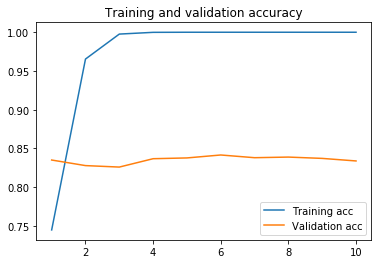

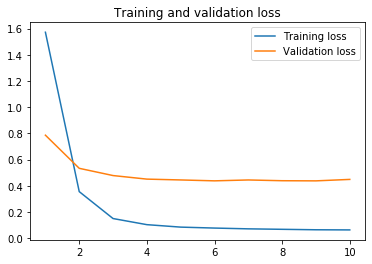

In [75]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Evaluate Model Using Test Data

### Tokenize the test data

In [0]:
test_dir = os.path.join(imdb_dir, 'test')
labels_test = []
texts_test = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        nm, ext = os.path.splitext(fname)
        if ext == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts_test.append(f.read())
            f.close()

            if label_type == 'neg':
                labels_test.append(0)
            else:
                labels_test.append(1)

In [0]:
sequences_test = tokenizer.texts_to_sequences(texts_test)
x_test = pad_sequences(sequences_test, maxlen=maxlen)
y_test = np.asarray(labels_test)

In [78]:
#model.load_weights('pre_trained_glove_model.h5')
score = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 54us/step


In [79]:
print('The accuracy of test data is: ', score[1])

The accuracy of test data is:  0.82984
